<a href="https://colab.research.google.com/github/Xarisviero/datastories_for_emme/blob/main/Copy_of_Homework_Lesson10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Για να φτιάξουμε wordclouds από κείμενα άρθρων χρειαζόμαστε τις παρακάτω βιβλιοθήκες, τις οποίες εισάγουμε όλες μαζί στην αρχή.

Εάν έχουμε ελληνικά κείμενα:
- βγάζουμε το # από την αρχή της παρακάτω εντολής (κάνουμε δλδ uncomment) και τρέχουμε το κελί
- όταν τελειώσει:
1. ξαναβάζουμε το # (κάνουμε comment)
2. Runtime -> Restart session and run all (ανανεώνουμε το session για να ξέρει ότι τώρα έχουμε και το λεξικό της βιβλιοθήκης spacy)

In [8]:
#!python -m spacy download el_core_news_sm

### ΕΙΣΑΓΩΓΗ ΒΙΒΛΙΟΘΗΚΩΝ

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# εάν έχουμε αγγλικά κείμενα
from wordcloud import WordCloud, STOPWORDS

# εάν έχουμε ελληνικά κείμενα
import spacy

In [10]:
# φτιάχνω κατευθείαν και το nlp για να το έχω έτοιμο για τα wordclouds μου και όποια ανάλυση κειμένου θέλω να κάνω
nlp = spacy.load('el_core_news_sm')

### ΔΗΜΙΟΥΡΓΙΑ DATAFRAME

Αρχικά, φέρνουμε τα δεδομένα μας (αρχεία xlsx ή csv) και τα ανεβάζουμε στο drive μας.

Στη συνέχεια, εισάγουμε τα δεδομένα μας στην python (φτιάχνουμε dataframes).

Στην αριστερή μπάρα στο colab:
- πατάτε το εικονίδιο του φακέλου (τελευταίο εικονίδιο)
- πατάτε το εικονίδιο του φακέλου με το σήμα του google drive και συνδέεστε στο drive σας
- AN TO KANETE ΓΙΑ ΠΡΩΤΗ ΦΟΡΑ στον υπολογιστή σας, θα σας πει να τρέξετε ένα κελί που δημιουργεί για να συνδεθείτε στο drive σας - Μόλις το τρέξετε θα σας ανοίξει ένα παράθυρο για να αποδεχθείτε τη σύνδεση
- πατάτε το φάκελο του drive και του MyDrive
- ΑΝ ΔΕΝ ΥΠΑΡΧΕΙ ο φάκελος του Drive, κάνετε Refresh το tab στον browser και θα εμφανιστεί
- πατάτε στο φάκελο που έχετε ανεβάσει το xlsx της efsyn
- εντοπίζετε το xslx, βάζετε πάνω του το πονίκι και πατάτε στις 3 τελίτσες που εμφανίζονται δεξιά του ονόματος του αρχείου
- πατάτε copy path στο μενού που εμφανίζεται

Σε ένα νέο κελί γράφετε:

```
df = pd.read_excel(<κάνετε paste το path που κάνατε copy στο τελευταίο παραπάνω βήμα, μέσα σε εισαγωγικά>)
```

In [11]:
# δημιουργία dataframe από το αρχείο των δεδομένων μας
kathimerini_df = pd.read_csv("/content/drive/MyDrive/kathimerini.gr-MAY23.csv")

In [12]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [13]:
kathimerini_df

,site,url,date,section,title,author,text
0,kathimerini.gr,https://www.kathimerini.gr/world/562396441/pri...,2023-05-01,ΚΟΣΜΟΣ,Πριγκόζιν: Η ουκρανική αντεπίθεση ίσως να είνα...,Newsroom,Η αναμενόμενη ουκρανική αντεπίθεση μπορεί να α...
1,kathimerini.gr,https://www.kathimerini.gr/society/562396447/p...,2023-05-01,ΚΟΙΝΩΝΙΑ,Πρωτομαγιά με βροχές και καταιγίδες σε όλη τη ...,Newsroom,Βροχερός αναμένεται ο καιρός σήμερα Πρωτομαγιά...
2,kathimerini.gr,https://www.kathimerini.gr/society/562396426/c...,2023-05-01,ΚΟΙΝΩΝΙΑ,"Χωρίς μετρό, ηλεκτρικό και τραμ την Πρωτομαγιά...",Newsroom,Με 24ωρη απεργία συμμετέχουν οι εργαζόμενοι στ...
3,kathimerini.gr,https://www.kathimerini.gr/world/562396435/ern...,2023-05-01,ΚΟΣΜΟΣ,Ερντογάν: Ο φερόμενος ως ηγέτης του Ισλαμικού ...,Newsroom,Ο «φερόμενος ως ηγέτης» της τζιχαντιστικής οργ...
4,kathimerini.gr,https://www.kathimerini.gr/politics/562396552/...,2023-05-01,ΠΟΛΙΤΙΚΗ,Σκέρτσος για Πρωτομαγιά: Οι τέσσερις προϋποθέσ...,Newsroom,Ο υπουργός Επικρατείας και κυβερνητικός εκπρόσ...
...,...,...,...,...,...,...,...
3689,kathimerini.gr,https://www.kathimerini.gr/politics/562449514/...,2023-05-31,ΠΟΛΙΤΙΚΗ,ΣΥΡΙΖΑ: Ο κ. Μητσοτάκης υιοθετεί την ακραία το...,Newsroom,"«Με τον πλέον επίσημο τρόπο, ο κ. Μητσοτάκης, ..."
3690,kathimerini.gr,https://www.kathimerini.gr/society/562449823/v...,2023-05-31,ΚΟΙΝΩΝΙΑ,"Βρίζουν, κορνάρουν, τρέχουν – Road rage στους ...",Δέσποινα Κόντη,"Βρίζουν, κορνάρουν άσκοπα, τρέχουν – ενίοτε κα..."
3691,kathimerini.gr,https://www.kathimerini.gr/culture/562449649/i...,2023-05-31,ΠΟΛΙΤΙΣΜΟΣ,Ιαπωνικοί θησαυροί στην Κρήτη,Ξένια Γεωργιάδου,"Η Ιαπωνία, ένα μικρό νησιωτικό έθνος στο ανατο..."
3692,kathimerini.gr,https://www.kathimerini.gr/politics/562449196/...,2023-05-31,ΠΟΛΙΤΙΚΗ,Μητσοτάκης: Ξεκινάμε από την αρχή ώστε να είμα...,Newsroom,Από το Πέραμα Μυλοποτάμου στο Ρέθυμνο ξεκίνησε...


### MISSING VALUES

Επειδή τα δεδομένα μας είναι πιθανό να έχουν ελλείπουσες τιμές (missing values), δηλαδή μπορεί να μην υπάρχει μια ημερομηνία σε ένα άρθρο ή ένας τίτλος ή οτιδήποτε, για να μην μας χτυπάει ο κώδικας παρακάτω, πετάμε απ' την αρχή όσα rows έχουν κενές τιμές (nan), με την παρακάτω εντολή:
```
# διαγραφή των rows με τιμή nan σε οποιοδήποτε column
df.dropna(inplace=True)
# reset_index για να ξαναγίνει συνεχής η αρίθμηση του index του dataframe
df = df.reset_index(drop=True)
```
Εννοείται ότι στη θέση του df βάζουμε το όνομα που δώσαμε στο dataframe μας.

In [14]:
# διαγραφή των rows με τιμή nan σε οποιοδήποτε column
kathimerini_df.dropna(inplace=True)

In [15]:
# reset_index για να ξαναγίνει συνεχής η αρίθμηση του index του dataframe
kathimerini_df = kathimerini_df.reset_index(drop=True)

### ΕΠΙΣΚΟΠΗΣΗ ΤΩΝ ΔΕΔΟΜΕΝΩΝ

Εξετάζουμε το dataframe για να κατανοήσουμε τι περιέχουν τα δεδομένα μας, με εργαλεία που έχουμε μάθει όπως, τα head(), shape, describe(), columns, unique() κλπ.

In [16]:
kathimerini_df.head()

,site,url,date,section,title,author,text
0,kathimerini.gr,https://www.kathimerini.gr/world/562396441/pri...,2023-05-01,ΚΟΣΜΟΣ,Πριγκόζιν: Η ουκρανική αντεπίθεση ίσως να είνα...,Newsroom,Η αναμενόμενη ουκρανική αντεπίθεση μπορεί να α...
1,kathimerini.gr,https://www.kathimerini.gr/society/562396447/p...,2023-05-01,ΚΟΙΝΩΝΙΑ,Πρωτομαγιά με βροχές και καταιγίδες σε όλη τη ...,Newsroom,Βροχερός αναμένεται ο καιρός σήμερα Πρωτομαγιά...
2,kathimerini.gr,https://www.kathimerini.gr/society/562396426/c...,2023-05-01,ΚΟΙΝΩΝΙΑ,"Χωρίς μετρό, ηλεκτρικό και τραμ την Πρωτομαγιά...",Newsroom,Με 24ωρη απεργία συμμετέχουν οι εργαζόμενοι στ...
3,kathimerini.gr,https://www.kathimerini.gr/world/562396435/ern...,2023-05-01,ΚΟΣΜΟΣ,Ερντογάν: Ο φερόμενος ως ηγέτης του Ισλαμικού ...,Newsroom,Ο «φερόμενος ως ηγέτης» της τζιχαντιστικής οργ...
4,kathimerini.gr,https://www.kathimerini.gr/politics/562396552/...,2023-05-01,ΠΟΛΙΤΙΚΗ,Σκέρτσος για Πρωτομαγιά: Οι τέσσερις προϋποθέσ...,Newsroom,Ο υπουργός Επικρατείας και κυβερνητικός εκπρόσ...


In [17]:
kathimerini_df.columns

Index(['site', 'url', 'date', 'section', 'title', 'author', 'text'], dtype='object')

In [18]:
kathimerini_df.shape

(3656, 7)

In [19]:
kathimerini_df.describe()

,site,url,date,section,title,author,text
count,3656,3656,3656,3656,3656,3656,3656
unique,1,3656,31,41,3652,297,3653
top,kathimerini.gr,https://www.kathimerini.gr/world/562396441/pri...,2023-05-23,ΚΟΣΜΟΣ,Ελληνικές αντιδράσεις στο ντους,Newsroom,"Μαζί τις νίκες, μαζί και τις… γκέλες. Ο Παναθη..."
freq,3656,1,166,1003,2,2213,2


In [20]:
kathimerini_df['section'].unique()

array(['ΚΟΣΜΟΣ', 'ΚΟΙΝΩΝΙΑ', 'ΠΟΛΙΤΙΚΗ', 'ΤΕΧΝΟΛΟΓΙΑ', 'ΠΟΛΙΤΙΣΜΟΣ',
       'ΒΙΒΛΙΟ', 'ΔΙΕΘΝΗΣ ΟΙΚΟΝΟΜΙΑ', 'ΑΘΛΗΤΙΣΜΟΣ', 'ΘΕΑΤΡΟ',
       'THE NEW YORK TIMES', 'ΕΠΙΧΕΙΡΗΣΕΙΣ', 'ΜΟΥΣΙΚΗ', 'ΚΟΜΜΑΤΑ',
       'ΕΛΛΗΝΙΚΗ ΟΙΚΟΝΟΜΙΑ', 'ΑΡΧΙΤΕΚΤΟΝΙΚΗ', 'ΑΤΖΕΝΤΑ', 'LIFE', 'ΑΓΟΡΕΣ',
       'ΟΙΚΟΝΟΜΙΑ', 'ΕΠΙΣΤΗΜΗ', 'ΕΞΩΤΕΡΙΚΗ ΠΟΛΙΤΙΚΗ', 'PODCASTS',
       'ΚΙΝΗΜΑΤΟΓΡΑΦΟΣ', 'ΜΟΥΣΕΙΑ', 'ΜΠΑΣΚΕΤ', 'ΠΕΡΙΒΑΛΛΟΝ', 'ΕΙΚΑΣΤΙΚΑ',
       'ΥΓΕΙΑ', 'ΠΟΔΟΣΦΑΙΡΟ', 'ΤΗΛΕΟΡΑΣΗ', 'ΠΡΟΣΩΠΑ', 'ΑΘΗΝΑΪΚΑ PLUS',
       'ΠΟΛΗ', 'REAL ESTATE', 'ΚΥΒΕΡΝΗΣΗ', 'ΒΟΥΛΗ', 'HOURS', 'ΣΠΟΡ',
       'ΑΥΤΟΚΙΝΗΤΟ', 'ΕΡΕΥΝΕΣ', 'NEWSASSET'], dtype=object)

### ΣΥΝΕΝΩΣΗ ΣΤΗΛΩΝ ΚΕΙΜΕΝΩΝ

Αν θέλουμε να ενώσουμε κείμενα από δυο ή περισσότερες στήλες και να τα σώσουμε σε μια νέα στήλη, (π.χ. τον τίτλο με το κείμενο του άρθρου), μπορούμε να το κάνουμε ή με απλή πρόσθεση των επιθυμητών στηλών και πρόσθεση κενού ανάμεσά τους:

```
df["full_text"] = df["title"] + " " + df["body_text"]
```
ή με το aggregate

```
df['full_text'] = df[['title', 'body_text']].agg(' '.join, axis=1)
```

In [21]:
kathimerini_df['full_text']= kathimerini_df[['title','author']].agg(''.join,axis=1)

### DATETIME

Για να μπορούμε να κάνουμε αναλύσεις βάσει του χρόνου, μετατρέπουμε τις ημερομηνίες από string σε datetime, με την εντολή:

```
df['datetime'] = pd.to_datetime(df['date'], format='%Y-%m-%d %H:%M')
```
Στο παραπάνω παράδειγμα, η νέα στήλη που φτιάχνουμε θα λέγεται 'datetime', η υπάρχουσα στήλη των ημερομηνιών στο df μας λέγεται 'date' και η μορφή των ημερομηνιών που περιέχει είναι: ΕΤΟΣ-ΜΗΝΑΣ-ΗΜΕΡΑ ΩΡΑ:ΛΕΠΤΑ (π.χ. 2024-06-05 13:41)

H μορφή των ημερομηνιών στη στήλη 'date', καθορίζει το format='', που θα βάλουμε μέσα στην παρέμθεση στην εντολή μας. Κάθε site ή εφαρμογή επιλέγει τον τρόπο παρουσίασης των ημερομηνιών που του αρέσει (π.χ. κάποιος βάζει τις ημερομηνίες στη μορφή: 5 Ιουνίου 2024)

Τους κωδικούς για το format θα τους βρείτε εδώ: https://docs.python.org/3/library/datetime.html#strftime-and-strptime-behavior

In [22]:
# Μετατροπή της στήλης των ημερομηνιών σε datetime
kathimerini_df['datetime'] = pd.to_datetime(kathimerini_df['date'], format='%Y-%m-%d')

Αφού μετατρέψουμε τις ημερομηνίες σε datetime, τώρα μπορούμε να φτιάξουμε στήλες με τα έτη, τους μήνες, τις μέρες κλπ.

```
df['year'] = pd.DatetimeIndex(df['datetime']).year
df['month'] = pd.DatetimeIndex(df['datetime']).month
df['day'] = pd.DatetimeIndex(df['datetime']).day
df['hour'] = pd.DatetimeIndex(df['datetime']).hour
```

In [23]:
# στήλη έτους
kathimerini_df['year'] = pd.DatetimeIndex(kathimerini_df['datetime']).year
# στήλη μήνα
kathimerini_df['month']=pd.DatetimeIndex(kathimerini_df['datetime']).month
# στήλη μέρας
kathimerini_df['day'] = pd.DatetimeIndex(kathimerini_df['datetime']).day

### ΓΡΑΦΗΜΑΤΑ ΠΕΡΙΓΡΑΦΙΚΗΣ ΑΝΑΛΥΣΗΣ ΤΩΝ ΔΕΔΟΜΕΝΩΝ

Με τις τεχνικές φιλτραρίσματος, σορταρίσματος και γκρουπαρίσματος που έχουμε μάθει, μπορούμε να φτιάξουμε γραφήματα που να απαντούν ερωτήματα όπως:

- ποιο είναι το πλήθος της αρθρογραφίας ανά ώρα;
- ποιο είναι το πλήθος της αρθρογραφίας ανά θεματική κατηγορία; ανά συντάκτη;
- πώς μεταβάλεται το πλήθος της αρθρογραφίας από μέρα σε μέρα; συνολικά και ανά κατηγορία;
- ποιοι είναι οι πολυγραφέστεροι συντάκτες;

<Axes: title={'center': 'Πλήθος της αρθρογραφίας ανά θεματική κατηγορία'}, xlabel='section'>

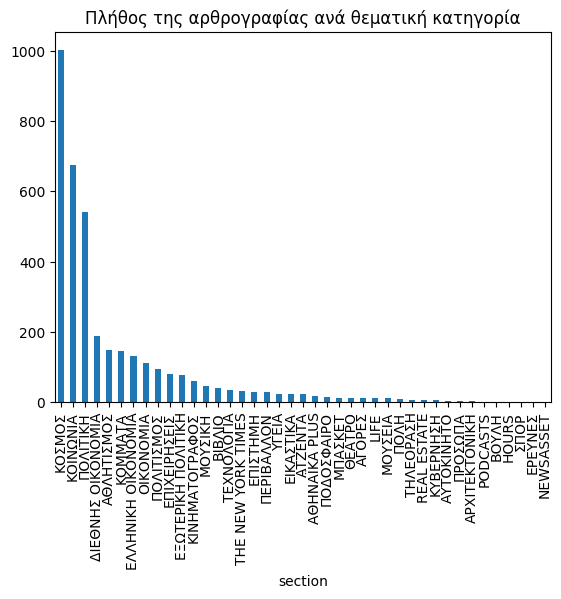

In [24]:
kathimerini_df['section'].value_counts().plot(kind='bar',
                                              x='Θεματική Κατηγορία',
                                              y='Πλήθος άρθων',
                                              title='Πλήθος της αρθρογραφίας ανά θεματική κατηγορία')

In [25]:
 kathimerini_df.groupby(['day', 'section']).size().reset_index(name='article_count')

,day,section,article_count
0,1,THE NEW YORK TIMES,1
1,1,ΑΘΛΗΤΙΣΜΟΣ,4
2,1,ΒΙΒΛΙΟ,2
3,1,ΔΙΕΘΝΗΣ ΟΙΚΟΝΟΜΙΑ,4
4,1,ΕΛΛΗΝΙΚΗ ΟΙΚΟΝΟΜΙΑ,2
...,...,...,...
638,31,ΜΠΑΣΚΕΤ,1
639,31,ΟΙΚΟΝΟΜΙΑ,15
640,31,ΠΟΛΙΤΙΚΗ,22
641,31,ΠΟΛΙΤΙΣΜΟΣ,2


<Axes: title={'center': 'Πολυγραφέστεροι συντάκτες'}, xlabel='author'>

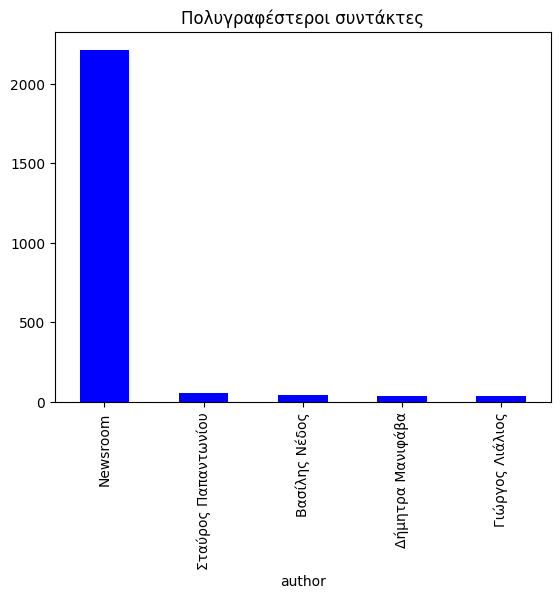

In [26]:
kathimerini_df['author'].value_counts().head().plot(kind='bar',
                                                    color='blue',
                                                    x='Συντάκτης',
                                                    y='Πλήθος άρθρων',
                                                    title='Πολυγραφέστεροι συντάκτες')

## Wordclouds

Τα wordclouds είναι ένα γράφημα που μας επιτρέπει να σχηματίσουμε μια γρήγορη άποψη για τη θεματολογία ενός κειμένου ή ενός σώματος κειμένων.

Μπορούμε να φτιάξουμε wordclouds για το σύνολο των κειμένων μας, αλλά μπορεί να είναι χρησιμότερο να το χρησιμοποιήσουμε σε στοχευμένα κείμενα.

Π.χ.: ας υποθέσουμε ότι από τα προηγούμενα γραφήματα είδαμε ότι το πλήθος της αρθρογραφίας μια συγκεκριμένη μέρα (ή σε ένα γκρουπ ημερών) είναι πολύ μεγαλύτερο από το μέσο όρο του πλήθους των άρθρων ανά ημέρα. Και πιο συγκεκριμένα, είναι μεγαλύτερο στην κατηγορία αθλητικά.

Αν φτιάξουμε ένα wordcloud μόνο για τα άρθρα της συγκεκριμένης κατηγορίας, της συγκεκριμένης ημέρας, θα βρούμε γρήγορα τις λέξεις που αφορούν το σημαντικό αθλητικό γεγονός εκείνης της ημέρας.

#### ΠΑΡΑΔΕΙΓΜΑ WORDCLOUD ME KEIMENO ΚΑΤΕΥΘΕΙΑΝ AΠΟ TH ΣΤΗΛΗ ΚΕΙΜΕΝΟΥ ΤΟΥ DATAFRAME

**!!!ΠΡΟΣΟΧΗ!!!** Eπειδή το dataframe φτιάχνεται από αρχείο που είναι στο drive μου, μην κάνετε uncomment και τρέξετε τα παρακάτω κελιά γιατί θα εξαφανιστούν τα outputs.

In [27]:
# df = pd.read_excel("/content/drive/MyDrive/2023/teaching python/Lesson 9/efsyn_full_articles_ekloges_2023_7_5_2023.xlsx")
# df.tail()

In [28]:
# df.dropna(inplace=True)
# df = df.reset_index(drop=True)

In [29]:
# df['text'] = df[['title', 'full_text']].agg(' '.join, axis=1)

In [30]:
# df[['date', "section"]].describe()

In [31]:
# df['datetime'] = pd.to_datetime(df['date'], format='%Y-%m-%d %H:%M')
# df['day'] = pd.DatetimeIndex(df['datetime']).day

In [32]:
# df[df["section"]=="ΠΟΛΙΤΙΚΗ"].groupby("day", as_index=False)['title'].count().sort_values("title", ascending=False)

Βλέπω ότι τα περισσότερα άρθρα στην κατηγορία ΠΟΛΙΤΙΚΗ ήταν στις 6 Ιουνίου (τα δεδομένα μου είναι από 30/5 - 6/6 του 2023). Φιλτράρω το dataframe μου.

In [33]:
# df[(df["section"]=="ΠΟΛΙΤΙΚΗ") & (df["day"]==6)]["text"]

Ακριβώς αυτό το φίλτρο μπορώ να το βάλω στην παράμετρο του generate() στο wordcloud

In [34]:
# wordcloud = WordCloud(
#     stopwords = nlp.Defaults.stop_words,
#     width = 2000,
#     height = 1000,
#     background_color = 'black'
#  ).generate(' '.join(df[(df["section"]=="ΠΟΛΙΤΙΚΗ") & (df["day"]==6)]["text"]))
# fig = plt.figure(
#     figsize = (10, 8),
#     facecolor = 'k',
#     edgecolor = 'k')
# plt.imshow(wordcloud, interpolation = 'bilinear')
# plt.axis('off')
# plt.tight_layout(pad=0)
# plt.show()

Κι αν θέλω να κάνω και lemmatization για να φύγουν οι διαφορετικές πτώσεις των ίδιων λέξεων:

In [35]:
# wordcloud = WordCloud(
#     stopwords = nlp.Defaults.stop_words,
#     width = 2000,
#     height = 1000,
#     background_color = 'black'
#  ).generate(' '.join(token.lemma_ for token in nlp(' '.join(df[(df["section"]=="ΠΟΛΙΤΙΚΗ") & (df["day"]==6)]["text"]))))
# fig = plt.figure(
#     figsize = (10, 8),
#     facecolor = 'k',
#     edgecolor = 'k')
# plt.imshow(wordcloud, interpolation = 'bilinear')
# plt.axis('off')
# plt.tight_layout(pad=0)
# plt.show()

Για όποιον θα ήθελε να παίξει με την εμφάνιση του wordcloud: https://amueller.github.io/word_cloud/auto_examples/index.html

## ΣΥΜΠΕΡΑΣΜΑΤΑ

Τέλος, γράψτε ένα σύντομο κείμενο για τα ευρήματα των αναλύσεών σας.

In [36]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

Ας φτιάξουμε ένα μικρότερο dataframe (μόνο με τις στήλες της ημερομηνίας και του κειμένου). Στην συνέχεια δείξε μου τα πέντα τελευταιά άρθρα

In [37]:
short_kathimerini_df = kathimerini_df[['datetime','text' ]]

In [38]:
short_kathimerini_df.tail()

,datetime,text
3651,2023-05-31,"«Με τον πλέον επίσημο τρόπο, ο κ. Μητσοτάκης, ..."
3652,2023-05-31,"Βρίζουν, κορνάρουν άσκοπα, τρέχουν – ενίοτε κα..."
3653,2023-05-31,"Η Ιαπωνία, ένα μικρό νησιωτικό έθνος στο ανατο..."
3654,2023-05-31,Από το Πέραμα Μυλοποτάμου στο Ρέθυμνο ξεκίνησε...
3655,2023-05-31,Ο ονειρικός κόσμος του Νίκου Αγγελίδη παρουσιά...


In [39]:
short_kathimerini_df['text']

0       Η αναμενόμενη ουκρανική αντεπίθεση μπορεί να α...
1       Βροχερός αναμένεται ο καιρός σήμερα Πρωτομαγιά...
2       Με 24ωρη απεργία συμμετέχουν οι εργαζόμενοι στ...
3       Ο «φερόμενος ως ηγέτης» της τζιχαντιστικής οργ...
4       Ο υπουργός Επικρατείας και κυβερνητικός εκπρόσ...
                              ...                        
3651    «Με τον πλέον επίσημο τρόπο, ο κ. Μητσοτάκης, ...
3652    Βρίζουν, κορνάρουν άσκοπα, τρέχουν – ενίοτε κα...
3653    Η Ιαπωνία, ένα μικρό νησιωτικό έθνος στο ανατο...
3654    Από το Πέραμα Μυλοποτάμου στο Ρέθυμνο ξεκίνησε...
3655    Ο ονειρικός κόσμος του Νίκου Αγγελίδη παρουσιά...
Name: text, Length: 3656, dtype: object

Ας ενώσουμε όλα τα κέιμενα της 27ης Μαΐου

In [40]:
text =short_kathimerini_df['text'].str.cat(sep = ' ')

Ας δούμε τα STOPWORDS

In [41]:
list(STOPWORDS)[0:20]

['could',
 "you've",
 'under',
 'been',
 'there',
 "aren't",
 'like',
 'but',
 "when's",
 'we',
 'k',
 'other',
 "i'll",
 'why',
 'down',
 'had',
 "where's",
 "won't",
 "i'm",
 'yourselves']

Ας φτιάξουμε ένα συννεφόλεξο με τις συχνότερες λέξεις

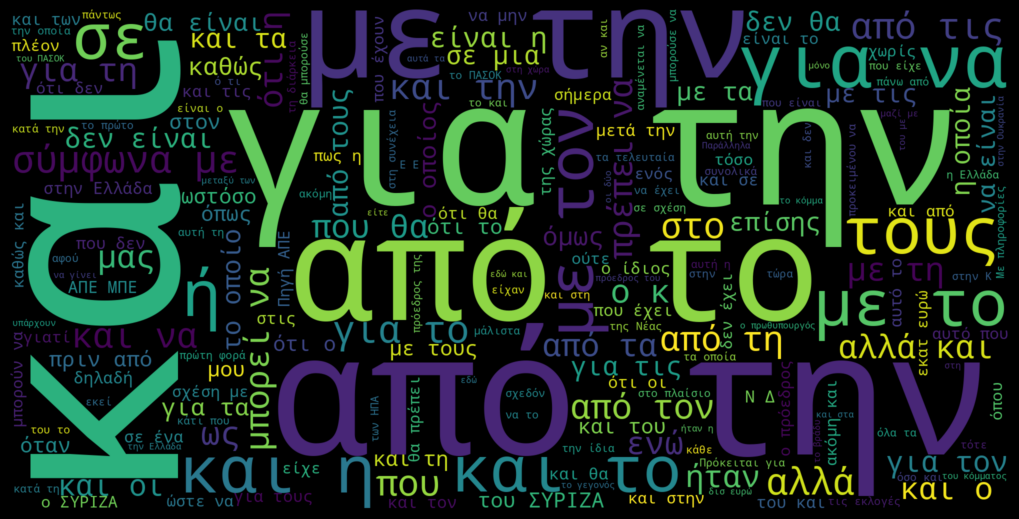

In [42]:
wordcloud = WordCloud(
#   stopwords = STOPWORDS,
    width = 2000,
    height = 1000,
    background_color = 'black'
 ).generate(text)
fig = plt.figure(
    figsize = (10, 8),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

Ας βρούμε τα Ελληνικά Stopwords

In [43]:
import spacy

In [44]:
nlp = spacy.load('el_core_news_sm')

In [45]:
list(nlp.Defaults.stop_words)[0:20]

['εκείνο',
 'όποια',
 'κάμποσην',
 'κυρίως',
 'καλώς',
 'τυχόν',
 'εσείς',
 'ορισμένων',
 'οι',
 'λίγο',
 'όσος',
 'μια',
 'έκαστοι',
 'ταύτη',
 'ήσουν',
 'μόνοι',
 'πάντοτε',
 'η',
 'τούτου',
 'εκείνων']

Ας φτίαξουμε ενα συννεφόλεξο με τις συχνότερες λέξεις

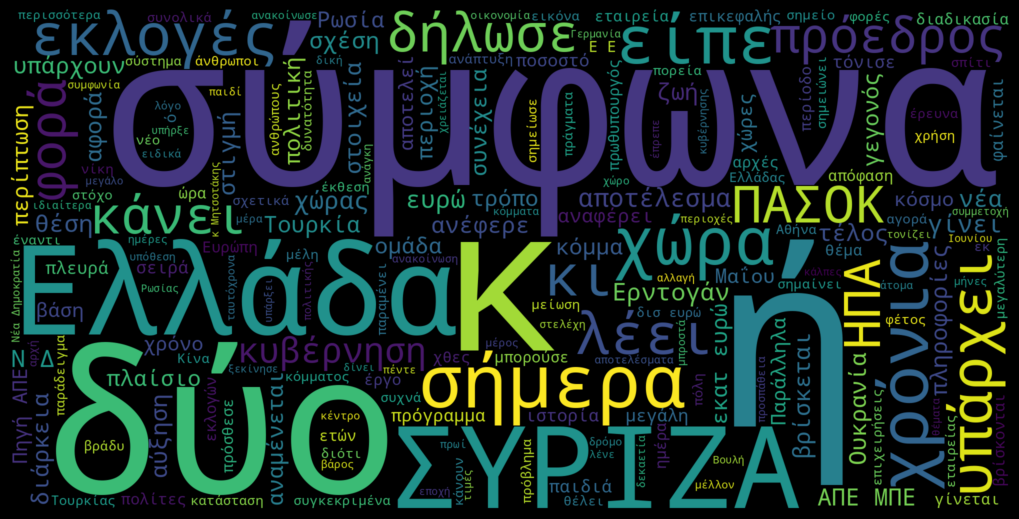

In [46]:
wordcloud = WordCloud(
    stopwords = nlp.Defaults.stop_words,
    width = 2000,
    height = 1000,
    background_color = 'black'
 ).generate(text)
fig = plt.figure(
    figsize = (10, 8),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()